In [265]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 1. Data Loading:

In [266]:
url='https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/hepatitis.csv'

In [267]:
df=pd.read_csv(url)

In [268]:
df.head(5 )

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,0,30,2,1.0,2,2,2,2,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,0,50,1,1.0,2,1,2,2,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,0,78,1,2.0,2,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,0,31,1,NaN,1,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,0,34,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


# 2. Data Preprocessing:

In [269]:
df.shape

(154, 20)

In [270]:
df.isnull().sum()

Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             0
MALAISE             0
ANOREXIA            0
LIVER BIG           9
LIVER FIRM         10
SPLEEN PALPABLE     4
SPIDERS             4
ASCITES             4
VARICES             4
BILIRUBIN           5
ALK PHOSPHATE      28
SGOT                3
ALBUMIN            15
PROTIME            66
HISTOLOGY           0
dtype: int64

In [271]:
df.isnull().sum()

Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             0
MALAISE             0
ANOREXIA            0
LIVER BIG           9
LIVER FIRM         10
SPLEEN PALPABLE     4
SPIDERS             4
ASCITES             4
VARICES             4
BILIRUBIN           5
ALK PHOSPHATE      28
SGOT                3
ALBUMIN            15
PROTIME            66
HISTOLOGY           0
dtype: int64

In [272]:
df.isnull().sum()

Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             0
MALAISE             0
ANOREXIA            0
LIVER BIG           9
LIVER FIRM         10
SPLEEN PALPABLE     4
SPIDERS             4
ASCITES             4
VARICES             4
BILIRUBIN           5
ALK PHOSPHATE      28
SGOT                3
ALBUMIN            15
PROTIME            66
HISTOLOGY           0
dtype: int64

In [273]:
for i in df.columns:
    if df[i].isnull().sum()>0:
        df[i].fillna(df[i].mean(),inplace=True)
   

In [345]:
df.Class.value_counts()

Class
0    122
1     32
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

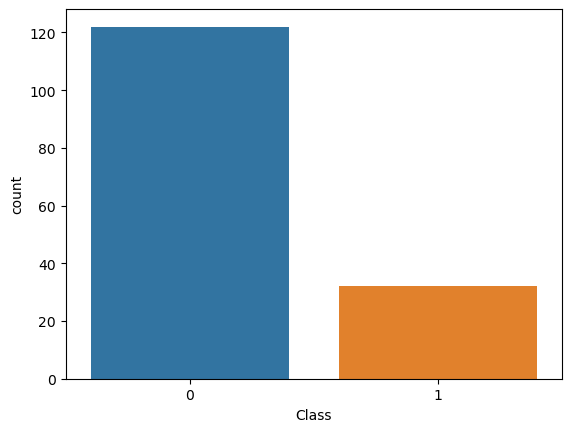

In [346]:
sns.countplot(x='Class',data=df)

In [275]:
df.isnull().sum().sum()

0

In [278]:
X=df.drop('class',axis=1)

In [279]:
y=df['Class']

In [280]:
#1 indicates a positive case and 0 indicates a negative case.

# 3. Decision Tree Model:

In [281]:
from sklearn.model_selection import train_test_split

In [321]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,train_size=.7,random_state=80)

In [322]:
from sklearn.tree import DecisionTreeClassifier

In [323]:
dtc=DecisionTreeClassifier()

In [324]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

# 4. Model Evaluation:

In [325]:
predict_ytest=dtc.predict(xtest)

In [326]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix,RocCurveDisplay,classification_report,accuracy_score,roc_auc_score

In [327]:
precision_score(ytest,predict_ytest)

0.4444444444444444

In [328]:
accuracy_score(ytest,predict_ytest)

0.7872340425531915

In [307]:
recall_score(ytest,predict_ytest)

0.625

In [308]:
f1_score(ytest,predict_ytest)

0.5882352941176471

In [334]:
c=confusion_matrix(ytest,predict_ytest )

In [335]:
import seaborn as sns


<Axes: >

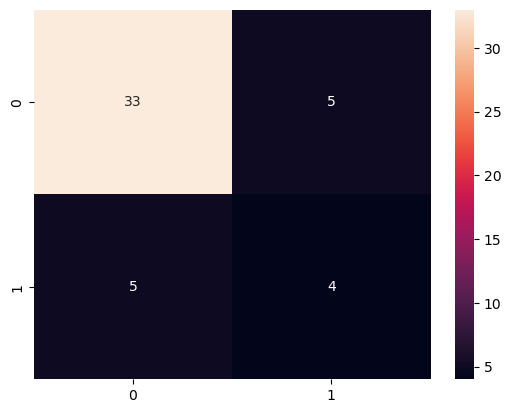

In [337]:
sns.heatmap(c,annot=True)

Result=print(classification_report(ytest, dtc.predict(xtest)))

In [353]:
import matplotlib.pyplot as plt

RocCurveDisplay.from_predictions(ytest,predict_ytest)
plt.plot([0,1],[0,1])

# 5. Results and Analysis:

we found there TP=33 , FP=5 , FN=5, TN=4

accuracy=76%

There FN is more dangerous then FP because model predict some one who  affect it or suffering those dangerous disease but model predict he or she absolutely fine. 

If the patient don't take some step for his disease then it could be dangerous for his future. There are some dangerous disease so we need to  decrease FN value then the model could be more efficient for identified who is affected(suffering) or not .in this model FN  is more dangerous because a patient who affected the disease but the model not recognised as a patient 